
# 小地域の収入推定

```Data```フォルダには、小地域の収入データ(```income_district.csv```)と国勢調査の小地域集計データが格納されています。

国勢調査の小地域集計データ（人口構成、労働力構成、住宅形態など）から、その地域の収入を推定することが考えられます。推定のための機械学習・深層学習モデルを構築しなさい。


- データを観察・理解する上で、データの構造を説明しながら、適切なデータ整形を行いなさい
- データ構造や分析結果に対して、少なくとも二つの図で可視化を行いなさい
- モデルの精度を評価し、できるだけ精度が高いモデルを得るよう、適切な特徴量エンジニアリングやモデル選定の考えもまとめなさい

1.准备数据

In [1]:
#导入数据为dataframe

import pandas as pd
import numpy as np
import glob
import os

csv_files = glob.glob('./data/*.csv')
df_dict = {}
for file in csv_files:
    filename = os.path.basename(file)
    name = os.path.splitext(filename)[0]
    df = pd.read_csv(file)
    df_dict[name] = df 
for key in df_dict:
    print(f'--- {key} ---') 
    display(df_dict[key].head())

--- h27_age_df ---


,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,10-14,15-19,20-24,...,55-59_female,60-64_female,65-69_female,70-74_female,75-79_female,80-84_female,85-89_female,90-94_female,95-99_female,100_female
0,45201,NaN,1,宮崎県,宮崎市,NaN,NaN,19220,20777,17510,...,13420,15035,16040,11697,10052,9160,6430,3357,1021,208
1,45201,10.0,2,宮崎県,宮崎市,橘通西,NaN,32,56,61,...,35,47,43,44,20,16,9,5,3,1
2,45201,1001.0,3,宮崎県,宮崎市,橘通西,１丁目,9,6,11,...,15,15,16,14,7,7,4,3,-,-
3,45201,1002.0,3,宮崎県,宮崎市,橘通西,２丁目,2,10,18,...,4,10,11,14,2,2,3,1,3,1
4,45201,1003.0,3,宮崎県,宮崎市,橘通西,３丁目,-,1,-,...,1,-,-,2,-,1,-,-,-,-


--- h27_family_df ---


,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,family_count,family_member_count,general_family_count,member_1,member_2,member_3,member_4,member_5,member_6,member_7
0,25201,NaN,1,滋賀県,大津市,NaN,NaN,136153,340973,135957,39153,39186,25980,22117,7034,1830,657
1,25201,10.0,2,滋賀県,大津市,葛川坂下町,NaN,19,38,19,8,7,1,2,1,-,-
2,25201,20.0,2,滋賀県,大津市,葛川木戸口町,NaN,10,17,10,5,4,-,1,-,-,-
3,25201,30.0,2,滋賀県,大津市,葛川中村町,NaN,15,31,15,7,4,3,-,-,-,1
4,25201,40.0,2,滋賀県,大津市,葛川坊村町,NaN,22,38,22,11,8,1,2,-,-,-


--- h27_gender_df2 ---


,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,population,male_population,female_population,family_count
0,18201,NaN,1,福井県,福井市,NaN,NaN,265904,128892,137012,99872
1,18201,10.0,2,福井県,福井市,明里町,NaN,386,191,195,193
2,18201,30.0,2,福井県,福井市,足谷町,NaN,X,X,X,X
3,18201,40.0,2,福井県,福井市,足羽,NaN,2881,1382,1499,1178
4,18201,4001.0,3,福井県,福井市,足羽,１丁目,771,375,396,314


--- h27_house_df ---


,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,family_house,own_house_family,public_rent_family,private_rent_family,salary_rent_family,room_rent_family,other_house_family,own_house_individual,public_rent_individual,private_rent_individual,salary_rent_individual,room_rent_individual,other_house_individual
0,25201,NaN,1,滋賀県,大津市,NaN,NaN,135957,97948,5183,27685,2501,777,1856,269022,9676,46261,5570,1585,2746
1,25201,10.0,2,滋賀県,大津市,葛川坂下町,NaN,19,19,-,-,-,-,-,38,-,-,-,-,-
2,25201,20.0,2,滋賀県,大津市,葛川木戸口町,NaN,10,10,-,-,-,-,-,17,-,-,-,-,-
3,25201,30.0,2,滋賀県,大津市,葛川中村町,NaN,15,14,-,-,1,-,-,30,-,-,1,-,-
4,25201,40.0,2,滋賀県,大津市,葛川坊村町,NaN,22,17,-,-,2,-,3,31,-,-,4,-,3


--- h27_house_info_df ---


,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,single_house_family,long_house_family,share_house_family,...,3-5floor_family,6-10floor_family,11floor_family,single_house_individual,long_house_individual,share_house_individual,1-2floor_individual,3-5floor_individual,6-10floor_individual,11floor_individual
0,27102,NaN,1,大阪府,大阪市都島区,NaN,NaN,9431,954,40447,...,9030,13457,16915,23379,1773,76699,1400,14645,21284,39370
1,27102,10.0,2,大阪府,大阪市都島区,片町,NaN,84,3,1342,...,166,896,276,202,8,1800,4,219,1152,425
2,27102,1001.0,3,大阪府,大阪市都島区,片町,１丁目,50,1,905,...,119,586,196,129,4,1242,4,135,763,340
3,27102,1002.0,3,大阪府,大阪市都島区,片町,２丁目,34,2,437,...,47,310,80,73,4,558,-,84,389,85
4,27102,20.0,2,大阪府,大阪市都島区,網島町,NaN,38,4,705,...,25,493,187,89,5,1188,-,36,768,384


--- h27_indusry_df ---


,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,A_agriculture_forestry_male,agriculture_male,B_fishing_male,...,K_real_estate_female,L_academic_female,M_accommodation_female,N_entertainment_female,O_education_female,P_health_care_female,Q_service_female,R_other_service_female,S_public_services_female,T_other_female
0,43101,NaN,1,熊本県,熊本市中央区,NaN,NaN,306,264,6,...,1127,1335,3898,2150,3058,9432,275,2841,1391,1989
1,43101,10.0,2,熊本県,熊本市中央区,安政町,NaN,-,-,-,...,3,-,4,2,-,2,-,2,-,1
2,43101,20.0,2,熊本県,熊本市中央区,井川淵町,NaN,-,-,-,...,2,1,4,2,5,6,-,2,2,1
3,43101,31.0,2,熊本県,熊本市中央区,出水,NaN,33,32,-,...,75,99,223,132,240,777,20,201,93,108
4,43101,3101.0,3,熊本県,熊本市中央区,出水,１丁目,-,-,-,...,11,10,21,15,21,62,2,19,10,10


--- h27_job_df ---


,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,A_administrative_male,B_professional_workers_male,C_office_workers_male,...,C_office_workers_female,D_sales_workers_female,E_service_workers_female,F_safety_workers_female,G_agriculture_workers_female,H_production_workers_female,I_transport_workers_female,J_construction_workers_female,K_cleaning_workers_female,L_other_wokers_female
0,13101,NaN,1,東京都,千代田区,NaN,NaN,1391,3359,2438,...,3291,1127,1023,65,1,235,8,16,192,1823
1,13101,10.0,2,東京都,千代田区,丸の内,NaN,X,X,X,...,X,X,X,X,X,X,X,X,X,X
2,13101,1001.0,3,東京都,千代田区,丸の内,１丁目,X,X,X,...,X,X,X,X,X,X,X,X,X,X
3,13101,1002.0,3,東京都,千代田区,丸の内,２丁目,X,X,X,...,X,X,X,X,X,X,X,X,X,X
4,13101,1003.0,3,東京都,千代田区,丸の内,３丁目,X,X,X,...,X,X,X,X,X,X,X,X,X,X


--- h27_labor_df ---


,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,labor_male,no_labor_male,labor_female,no_labor_female
0,23101,NaN,1,愛知県,名古屋市千種区,NaN,NaN,45761,15806,33891,32964
1,23101,10.0,2,愛知県,名古屋市千種区,青柳町,NaN,262,86,197,175
2,23101,1005.0,3,愛知県,名古屋市千種区,青柳町,５丁目,33,12,24,26
3,23101,1006.0,3,愛知県,名古屋市千種区,青柳町,６丁目,113,27,82,64
4,23101,1007.0,3,愛知県,名古屋市千種区,青柳町,７丁目,116,47,91,85


--- h27_marriage_df ---


,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,unmarried,married,divorced,unmarried_male,married_male,divorced_male,unmarried_female,married_female,divorced_female
0,39201,NaN,1,高知県,高知市,NaN,NaN,76365,153847,47056,38837,76315,11447,37528,77532,35609
1,39201,10.0,2,高知県,高知市,上町,NaN,864,1268,634,409,654,115,455,614,519
2,39201,1001.0,3,高知県,高知市,上町,１丁目,248,409,201,105,218,33,143,191,168
3,39201,1002.0,3,高知県,高知市,上町,２丁目,148,175,74,69,85,9,79,90,65
4,39201,1003.0,3,高知県,高知市,上町,３丁目,203,330,171,96,169,34,107,161,137


--- h27_work_status_df ---


,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,employer_male,self_employed_male,family_work_male,unkonwn_status_male,employer_female,self_employed_female,family_work_female,unkonwn_status_female
0,37201,NaN,1,香川県,高松市,NaN,NaN,91038,11731,957,2525,75462,3823,4209,1684
1,37201,10.0,2,香川県,高松市,塩屋町,NaN,30,7,1,-,26,2,3,1
2,37201,20.0,2,香川県,高松市,築地町,NaN,144,25,2,11,116,16,9,2
3,37201,30.0,2,香川県,高松市,塩上町,NaN,284,53,6,13,212,24,16,11
4,37201,3000.0,3,香川県,高松市,塩上町,NaN,14,5,1,-,16,2,2,2


--- income_district ---


,area_code,income_mean
0,13228,480.984419
1,43514,439.775281
2,23237,487.507769
3,18208,505.495103
4,12238,385.423846


In [2]:
#观察平均收入数据后，判断出只需要city级的数据，即筛选出level_identifier==1的数据

df_dict_selected = {}
for key in df_dict:
    df = df_dict[key]
    if 'level_identifier' in df.columns:
        df_dict_selected[key]=df[df['level_identifier']==1]
    else:
        df_dict_selected[key] = df
        
for key in df_dict_selected:
    print(f'--- {key} ---') 
    display(df_dict_selected[key].head())

--- h27_age_df ---


,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,10-14,15-19,20-24,...,55-59_female,60-64_female,65-69_female,70-74_female,75-79_female,80-84_female,85-89_female,90-94_female,95-99_female,100_female
0,45201,NaN,1,宮崎県,宮崎市,NaN,NaN,19220,20777,17510,...,13420,15035,16040,11697,10052,9160,6430,3357,1021,208
620,45202,NaN,1,宮崎県,都城市,NaN,NaN,7897,7689,6393,...,5850,6657,6568,5028,5154,4961,3732,1763,527,123
886,45203,NaN,1,宮崎県,延岡市,NaN,NaN,5950,5980,4499,...,4386,5206,5453,4253,4282,4115,2895,1402,413,68
1265,45204,NaN,1,宮崎県,日南市,NaN,NaN,2187,2294,1807,...,2011,2318,2445,2036,2073,2048,1440,743,222,33
1548,45205,NaN,1,宮崎県,小林市,NaN,NaN,2056,1962,1279,...,1766,1969,1964,1609,1685,1632,1266,737,227,38


--- h27_family_df ---


,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,family_count,family_member_count,general_family_count,member_1,member_2,member_3,member_4,member_5,member_6,member_7
0,25201,NaN,1,滋賀県,大津市,NaN,NaN,136153,340973,135957,39153,39186,25980,22117,7034,1830,657
593,25202,NaN,1,滋賀県,彦根市,NaN,NaN,45546,113679,45473,15044,11424,8020,6969,2659,944,413
998,25203,NaN,1,滋賀県,長浜市,NaN,NaN,41788,118193,41730,10951,10392,7500,6495,3437,1880,1075
1320,25204,NaN,1,滋賀県,近江八幡市,NaN,NaN,29784,81312,29751,7206,8226,5900,5105,1967,902,445
1512,25206,NaN,1,滋賀県,草津市,NaN,NaN,60224,137247,60180,24864,13212,9534,8575,2766,868,361


--- h27_gender_df2 ---


,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,population,male_population,female_population,family_count
0,18201,NaN,1,福井県,福井市,NaN,NaN,265904,128892,137012,99872
828,18202,NaN,1,福井県,敦賀市,NaN,NaN,66165,32558,33607,26545
994,18204,NaN,1,福井県,小浜市,NaN,NaN,29670,14539,15131,11220
1145,18205,NaN,1,福井県,大野市,NaN,NaN,33109,15683,17426,10698
1364,18206,NaN,1,福井県,勝山市,NaN,NaN,24125,11478,12647,7703


--- h27_house_df ---


,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,family_house,own_house_family,public_rent_family,private_rent_family,salary_rent_family,room_rent_family,other_house_family,own_house_individual,public_rent_individual,private_rent_individual,salary_rent_individual,room_rent_individual,other_house_individual
0,25201,NaN,1,滋賀県,大津市,NaN,NaN,135957,97948,5183,27685,2501,777,1856,269022,9676,46261,5570,1585,2746
593,25202,NaN,1,滋賀県,彦根市,NaN,NaN,45473,29873,808,11932,1487,246,1127,86659,1641,18925,2597,499,1472
998,25203,NaN,1,滋賀県,長浜市,NaN,NaN,41730,31174,929,7372,860,234,1161,98331,2024,12801,1449,504,1425
1320,25204,NaN,1,滋賀県,近江八幡市,NaN,NaN,29751,22222,1139,4974,699,162,555,66356,2351,9204,1247,319,801
1512,25206,NaN,1,滋賀県,草津市,NaN,NaN,60180,34073,842,21372,2001,364,1528,98803,1836,29116,3550,698,1843


--- h27_house_info_df ---


,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,single_house_family,long_house_family,share_house_family,...,3-5floor_family,6-10floor_family,11floor_family,single_house_individual,long_house_individual,share_house_individual,1-2floor_individual,3-5floor_individual,6-10floor_individual,11floor_individual
0,27102,NaN,1,大阪府,大阪市都島区,NaN,NaN,9431,954,40447,...,9030,13457,16915,23379,1773,76699,1400,14645,21284,39370
62,27103,NaN,1,大阪府,大阪市福島区,NaN,NaN,7531,1157,28069,...,3839,8476,15291,19168,2306,49349,608,5880,13158,29703
111,27104,NaN,1,大阪府,大阪市此花区,NaN,NaN,9049,424,20069,...,4384,4073,10988,22738,775,40944,884,7699,7484,24877
190,27106,NaN,1,大阪府,大阪市西区,NaN,NaN,4810,194,46117,...,2276,14654,29081,11999,377,77749,140,3280,21200,53129
268,27107,NaN,1,大阪府,大阪市港区,NaN,NaN,11038,488,27651,...,7847,8930,10507,27296,867,51004,471,12498,14357,23678


--- h27_indusry_df ---


,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,A_agriculture_forestry_male,agriculture_male,B_fishing_male,...,K_real_estate_female,L_academic_female,M_accommodation_female,N_entertainment_female,O_education_female,P_health_care_female,Q_service_female,R_other_service_female,S_public_services_female,T_other_female
0,43101,NaN,1,熊本県,熊本市中央区,NaN,NaN,306,264,6,...,1127,1335,3898,2150,3058,9432,275,2841,1391,1989
248,43102,NaN,1,熊本県,熊本市東区,NaN,NaN,776,749,14,...,919,1178,2961,2123,2624,10802,272,2398,1262,1673
493,43103,NaN,1,熊本県,熊本市西区,NaN,NaN,1695,1608,230,...,347,438,1637,891,1107,4665,149,1328,539,1025
657,43104,NaN,1,熊本県,熊本市南区,NaN,NaN,1830,1808,203,...,471,573,1805,1276,1480,7494,223,1519,577,1328
894,43105,NaN,1,熊本県,熊本市北区,NaN,NaN,2169,2136,4,...,490,760,2194,1418,2101,7398,270,1645,687,1313


--- h27_job_df ---


,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,A_administrative_male,B_professional_workers_male,C_office_workers_male,...,C_office_workers_female,D_sales_workers_female,E_service_workers_female,F_safety_workers_female,G_agriculture_workers_female,H_production_workers_female,I_transport_workers_female,J_construction_workers_female,K_cleaning_workers_female,L_other_wokers_female
0,13101,NaN,1,東京都,千代田区,NaN,NaN,1391,3359,2438,...,3291,1127,1023,65,1,235,8,16,192,1823
144,13102,NaN,1,東京都,中央区,NaN,NaN,2833,8027,6731,...,10997,3395,3501,90,2,803,46,27,762,4759
268,13103,NaN,1,東京都,港区,NaN,NaN,4869,11124,7726,...,12420,3833,4236,103,12,844,54,26,963,8841
415,13104,NaN,1,東京都,新宿区,NaN,NaN,3984,16054,11658,...,17201,6288,6929,263,19,1618,70,53,1987,12973
589,13105,NaN,1,東京都,文京区,NaN,NaN,3451,15083,9427,...,15001,4595,4270,86,12,1331,30,52,1147,5469


--- h27_labor_df ---


,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,labor_male,no_labor_male,labor_female,no_labor_female
0,23101,NaN,1,愛知県,名古屋市千種区,NaN,NaN,45761,15806,33891,32964
429,23102,NaN,1,愛知県,名古屋市東区,NaN,NaN,21403,6637,17626,14209
542,23103,NaN,1,愛知県,名古屋市北区,NaN,NaN,44853,17606,34961,33698
945,23104,NaN,1,愛知県,名古屋市西区,NaN,NaN,43786,14240,32761,27786
1172,23105,NaN,1,愛知県,名古屋市中村区,NaN,NaN,38918,14117,29065,24806


--- h27_marriage_df ---


,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,unmarried,married,divorced,unmarried_male,married_male,divorced_male,unmarried_female,married_female,divorced_female
0,39201,NaN,1,高知県,高知市,NaN,NaN,76365,153847,47056,38837,76315,11447,37528,77532,35609
479,39202,NaN,1,高知県,室戸市,NaN,NaN,2542,6899,2944,1550,3490,784,992,3409,2160
488,39203,NaN,1,高知県,安芸市,NaN,NaN,3783,8442,3302,2194,4245,851,1589,4197,2451
545,39204,NaN,1,高知県,南国市,NaN,NaN,11007,22844,7150,6073,11376,1699,4934,11468,5451
658,39205,NaN,1,高知県,土佐市,NaN,NaN,6047,13398,4524,3638,6712,1123,2409,6686,3401


--- h27_work_status_df ---


,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,employer_male,self_employed_male,family_work_male,unkonwn_status_male,employer_female,self_employed_female,family_work_female,unkonwn_status_female
0,37201,NaN,1,香川県,高松市,NaN,NaN,91038,11731,957,2525,75462,3823,4209,1684
278,37202,NaN,1,香川県,丸亀市,NaN,NaN,23937,3237,319,728,19577,1153,1264,568
432,37203,NaN,1,香川県,坂出市,NaN,NaN,10940,1785,125,285,9371,496,657,169
549,37204,NaN,1,香川県,善通寺市,NaN,NaN,7378,1174,78,117,5535,364,506,87
599,37205,NaN,1,香川県,観音寺市,NaN,NaN,12266,2818,383,445,10871,731,1536,356


--- income_district ---


,area_code,income_mean
0,13228,480.984419
1,43514,439.775281
2,23237,487.507769
3,18208,505.495103
4,12238,385.423846


In [3]:
#按区域编码合并所有dataframe，删除不需要的列

df_list_selected = list(df_dict_selected.values())
merged_df = df_list_selected[0]
for df in df_list_selected[1:]:
    if 'district_id' in df.columns:
        merged_df = pd.merge(merged_df, df, how='outer')
    else:
        merged_df = pd.merge(merged_df, df, left_on='district_id', right_on='area_code', how='outer')
selected_df = merged_df.drop(columns=['district2_id', 'level_identifier',
                                       'district_name', 'district2_name', 'area_code'])
display(selected_df.head())

,district_id,state_name,city_name,10-14,15-19,20-24,25-29,30-34,35-39,40-44,...,divorced_female,employer_male,self_employed_male,family_work_male,unkonwn_status_male,employer_female,self_employed_female,family_work_female,unkonwn_status_female,income_mean
0,1101.0,北海道,札幌市中央区,8004,9904,13478,16422,17811,18566,20375,...,20645,42944,4462,151,6564,39149,2641,1107,5261,449.979373
1,1102.0,北海道,札幌市北区,11727,14441,17788,14687,16204,18974,22244,...,25096,56247,5834,284,4910,48261,2144,1376,3645,395.847532
2,1103.0,北海道,札幌市東区,10408,12153,13775,15232,17385,19080,21889,...,24071,52567,5137,231,5219,45215,1717,1087,3290,404.742547
3,1104.0,北海道,札幌市白石区,7629,8461,10528,13275,14862,16234,17768,...,19778,41621,3873,150,5354,36841,1465,788,3758,385.278248
4,1105.0,北海道,札幌市豊平区,7856,9394,12191,14157,15469,16326,17929,...,20393,42472,3770,143,5149,38354,1800,779,3832,397.451303


In [4]:
#将‘“-”转为缺失值，用中位数代替缺失值

from sklearn.impute import SimpleImputer

selected_df.replace('-', np.nan, inplace=True)

cleaned_df = selected_df.drop(columns = ["district_id", 'state_name', 'city_name'])
imputer = SimpleImputer(strategy="median")
cleaned_df = imputer.fit_transform(cleaned_df)
cleaned_df = pd.DataFrame(cleaned_df, columns=
                          selected_df.drop(columns=["district_id", 'state_name', 'city_name']).columns)

In [5]:
#先尝试用原始数据进行简单预测
#因为特征较多，选择随机森林作为初始模型
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

X = cleaned_df.drop('income_mean', axis=1)
y = cleaned_df['income_mean']

assert len(X) == len(y)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=1)

model1 = RandomForestRegressor(n_estimators=100, random_state=1)
model1.fit(X_train1, y_train1)
y_pred1 = model1.predict(X_test1)

rmse1 = np.sqrt(mean_squared_error(y_test1, y_pred1))
mae1 = mean_absolute_error(y_test1, y_pred1)
r21 = r2_score(y_test1, y_pred1)

print(f"RMSE: {rmse1:.3f}")
print(f"MAE: {mae1:.3f}")
print(f"R² score: {r21:.3f}")

RMSE: 28.789
MAE: 17.124
R² score: 0.648


2.特征工程

Text(0.5, 1.0, 'Origin')

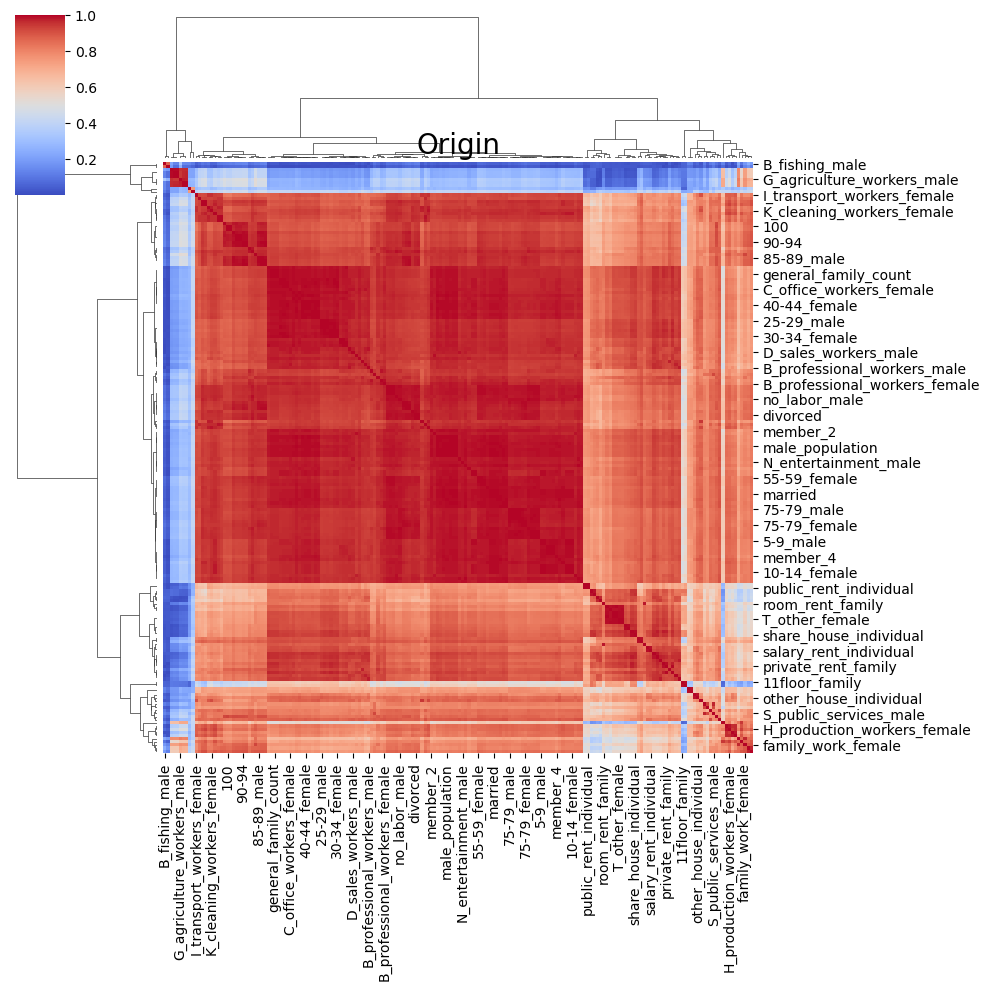

In [7]:
#画出特征的聚类树状图，观察数据结构

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
corr = X_scaled.corr().abs()

linkage_matrix = linkage(corr, method='ward')

g = sns.clustermap(corr, row_linkage=linkage_matrix, col_linkage=linkage_matrix, figsize=(10, 10), cmap='coolwarm')
g.ax_heatmap.set_title("Origin", fontsize=20)
#聚类图中红色部分很多，说明很多变量之间高度相关，需要去除冗余

In [8]:
#先尝试用SparsePCA对特征进行整体降维
#（选择压缩至12维是因为大于13后程序所需运行时间太长了）

from sklearn.decomposition import PCA, SparsePCA

spca = SparsePCA(n_components=12)
X_spca = spca.fit_transform(X)
print("整体降维后 shape:", X_spca.shape)

整体降维后 shape: (1903, 12)


In [9]:
#将整体降维后的数据代入初始模型进行预测

assert len(X_spca) == len(y)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_spca, y, test_size=0.3, random_state=1)

model1.fit(X_train2, y_train2)
y_pred2 = model1.predict(X_test2)

rmse2 = np.sqrt(mean_squared_error(y_test2, y_pred2))
mae2 = mean_absolute_error(y_test2, y_pred2)
r22 = r2_score(y_test2, y_pred2)

print(f"RMSE: {rmse2:.3f}")
print(f"MAE: {mae2:.3f}")
print(f"R² score: {r22:.3f}")

#整体降维后模型精度显著提升

RMSE: 26.509
MAE: 15.949
R² score: 0.701


In [10]:
#接下来考虑聚类之后，再对特征实施局部SparsePCA进行降维

from sklearn.cluster import AgglomerativeClustering

X_T = X.T
clusterer = AgglomerativeClustering(n_clusters=10)
labels = clusterer.fit_predict(X_T)

sparse_parts = []
for i in np.unique(labels):
    cols = X.columns[labels == i]
    subX = X[cols]
    
    if subX.shape[1] > 4:
        spca = SparsePCA(n_components=4)
        comp = spca.fit_transform(subX)
        sparse_parts.append(comp)
    else:
        if subX.shape[1] > 1:
            spca = SparsePCA(n_components=1)
            comp = spca.fit_transform(subX)
            sparse_parts.append(comp)
        else:
            sparse_parts.append(subX.values)

X_spca_grouped = np.hstack(sparse_parts)
print("局部降维后 shape:", X_spca_grouped.shape)

局部降维后 shape: (1903, 28)


In [11]:
#将局部降维后的数据代入同样的模型

assert len(X_spca_grouped) == len(y)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_spca_grouped, y, test_size=0.3, random_state=1)

model1.fit(X_train3, y_train3)
y_pred3 = model1.predict(X_test3)

rmse3 = np.sqrt(mean_squared_error(y_test3, y_pred3))
mae3 = mean_absolute_error(y_test3, y_pred3)
r23 = r2_score(y_test3, y_pred3)

print(f"RMSE: {rmse3:.3f}")
print(f"MAE: {mae3:.3f}")
print(f"R² score: {r23:.3f}")

#测试发现分为10个聚类，每个特征大于4的聚类压缩为4个特征，其余压为1个特征，最终得到28个特征时，局部降维的效果最佳
#（n_components大于5之后程序运行时间也太长了）
#和整体降维的效果差不多，相比原始数据提升许多

RMSE: 26.383
MAE: 16.119
R² score: 0.704


Text(0.5, 1.0, 'SparsePCA grouped')

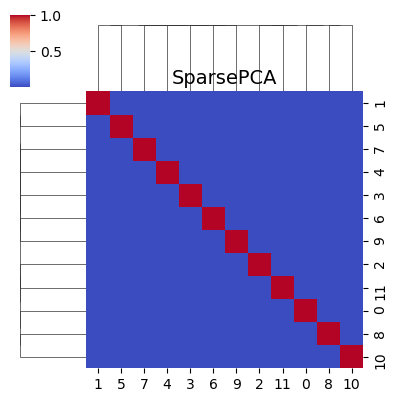

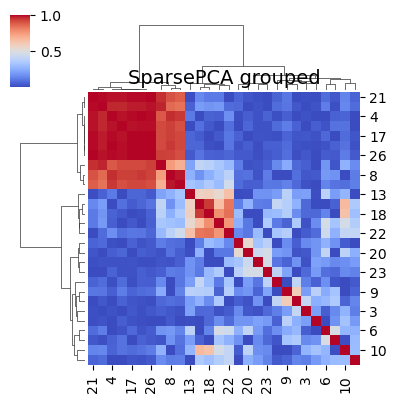

In [12]:
#画出降维后的数据的聚类树状图

X_spca_df = pd.DataFrame(X_spca)
corr2 = X_spca_df.corr().abs()

X_spca_grouped_df = pd.DataFrame(X_spca_grouped)
corr3 = X_spca_grouped_df.corr().abs()

linkage_matrix2 = linkage(corr2, method='ward')
linkage_matrix3 = linkage(corr3, method='ward')

g1 = sns.clustermap(corr2, row_linkage=linkage_matrix2, col_linkage=linkage_matrix2, figsize=(4, 4), cmap='coolwarm')
g1.ax_heatmap.set_title("SparsePCA", fontsize=14)
g2 = sns.clustermap(corr3, row_linkage=linkage_matrix3, col_linkage=linkage_matrix3, figsize=(4, 4), cmap='coolwarm')
g2.ax_heatmap.set_title("SparsePCA grouped", fontsize=14)

#可以看出整体降维后的特征结构很单纯，但局部降维后的特征还可以进一步压缩

In [13]:
#下一步，筛选出局部降维后的特征中红色区域的特征进行进一步SparsePCA
#先用fcluster将特征按距离分簇

from scipy.cluster.hierarchy import fcluster

labels = fcluster(linkage_matrix3, t=1, criterion='distance')

pd.Series(labels, index=X_spca_grouped_df.columns).value_counts()

1     7
3     4
2     3
5     2
6     1
10    1
13    1
11    1
8     1
15    1
12    1
4     1
16    1
14    1
7     1
9     1
Name: count, dtype: int64

In [14]:
#将含有大于2个特征的簇中的特征降维后，与其他特征合并生成新数据

cluster_map = pd.Series(labels, index=X_spca_grouped_df.columns)

new_features = []

for cid in sorted(cluster_map.unique()):
    features = cluster_map[cluster_map == cid].index.tolist()
    if len(features) == 7:
        spca = SparsePCA(n_components=4)
        reduced = spca.fit_transform(X_spca_grouped_df[features])
        reduced_df = pd.DataFrame(reduced, columns=[f'cluster_{cid}_spca{i+1}' for i in range(reduced.shape[1])])
        new_features.append(reduced_df)
    else:
        if len(features) == 4:
            spca = SparsePCA(n_components=3)
            reduced = spca.fit_transform(X_spca_grouped_df[features])
            reduced_df = pd.DataFrame(reduced, columns=[f'cluster_{cid}_spca{i+1}' for i in range(reduced.shape[1])])
            new_features.append(reduced_df)
        else:
            if len(features) == 3:
                spca = SparsePCA(n_components=2)
                reduced = spca.fit_transform(X_spca_grouped_df[features])
                reduced_df = pd.DataFrame(reduced, columns=[f'cluster_{cid}_spca{i+1}' for i in range(reduced.shape[1])])
                new_features.append(reduced_df)
            else:
                if len(features) == 2:
                    spca = SparsePCA(n_components=2)
                    reduced = spca.fit_transform(X_spca_grouped_df[features])
                    reduced_df = pd.DataFrame(reduced, columns=[f'cluster_{cid}_spca{i+1}' for i in range(reduced.shape[1])])
                    new_features.append(reduced_df)
                else:
                    new_feature = pd.Series(X_spca_grouped_df[features[0]], name=f'cluster_{cid}')
                    new_features.append(new_feature)

X_spca_grouped_df2 = pd.concat(new_features, axis=1)
print(f'进一步局部降维后：{X_spca_grouped_df2.shape}')

进一步局部降维后：(1903, 23)


In [15]:
#用新的局部降维数据代入初始模型进行预测

assert len(X_spca_grouped_df2) == len(y)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_spca_grouped_df2, y, test_size=0.3, random_state=1)

model1.fit(X_train4, y_train4)
y_pred4 = model1.predict(X_test4)

rmse4 = np.sqrt(mean_squared_error(y_test4, y_pred4))
mae4 = mean_absolute_error(y_test4, y_pred4)
r24 = r2_score(y_test4, y_pred4)

print(f"RMSE: {rmse4:.3f}")
print(f"MAE: {mae4:.3f}")
print(f"R² score: {r24:.3f}")

#多次测试探索出精度最高的降维组合，相比之前有所提高

RMSE: 25.751
MAE: 15.834
R² score: 0.718


Text(0.5, 1.0, 'SparsePCA grouped 2')

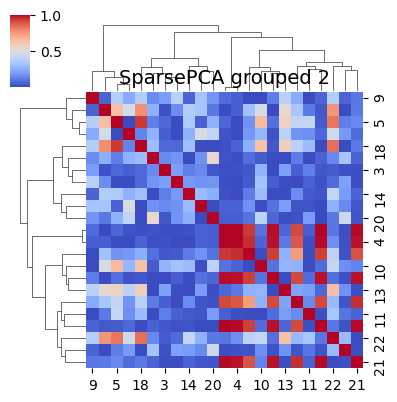

In [16]:
#画出进一步局部降维之后的数据的聚类树状图

corr4 = X_spca_grouped_df2.corr().abs()

linkage_matrix4 = linkage(corr4, method='ward')


g4 = sns.clustermap(corr3, row_linkage=linkage_matrix4, col_linkage=linkage_matrix4, figsize=(4, 4), cmap='coolwarm')
g4.ax_heatmap.set_title("SparsePCA grouped 2", fontsize=14)

#看得出数据的冗余减少了

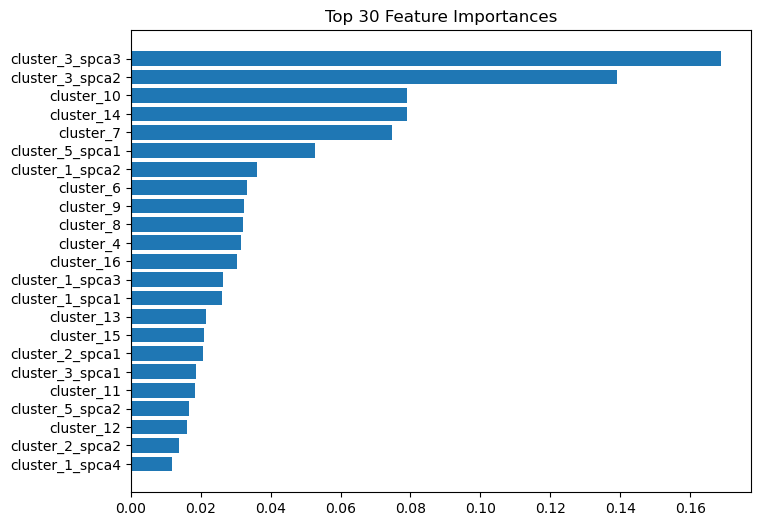

In [17]:
#再使用Random Forest评估特征重要性,尝试减少较不重要的特征

importances = model1.feature_importances_
feat_df = pd.DataFrame({'feature': X_spca_grouped_df2.columns,'importance': importances
                       }).sort_values(by='importance', ascending=False)

#可视化特征重要性
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.barh(feat_df['feature'], feat_df['importance'])
plt.gca().invert_yaxis()
plt.title("Top 30 Feature Importances")
plt.show()

In [18]:
top_feats = feat_df['feature'].head(21).tolist()
X_selected = X_spca_grouped_df2[top_feats]

assert len(X_selected) == len(y)
X_train5, X_test5, y_train5, y_test5 = train_test_split(X_selected, y, test_size=0.3, random_state=1)

model1.fit(X_train5, y_train5)
y_pred5 = model1.predict(X_test5)

rmse5 = np.sqrt(mean_squared_error(y_test5, y_pred5))
mae5 = mean_absolute_error(y_test5, y_pred5)
r25 = r2_score(y_test5, y_pred5)

print(f"RMSE: {rmse5:.3f}")
print(f"MAE: {mae5:.3f}")
print(f"R² score: {r25:.3f}")

#去掉最不重要的两个特征后，精度又得到些许提升

RMSE: 25.733
MAE: 15.738
R² score: 0.719


3.模型选择

In [20]:
#初始模型选择的是随机森林，现在用交叉验证分数比较各种模型

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score


models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=1),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1),
}

#为inearRegression, Ridge准备标准化数据
scaler = StandardScaler()
X_sel_scaled = scaler.fit_transform(X_selected)
X_sel_scaled = pd.DataFrame(X_sel_scaled, columns=X_selected.columns)
assert len(X_sel_scaled) == len(y)
X_train6, X_test6, y_train6, y_test6 = train_test_split(X_sel_scaled, y, test_size=0.3, random_state=1)

y_pred = {}
for name, model in models.items():
    if name in ["Ridge", "LinearRegression"]:
        model.fit(X_train6, y_train6)
        y_pred[name]= model.predict(X_test6)
        test_score = r2_score(y_test6, y_pred[name])
        cv_score = cross_val_score(model, X_sel_scaled, y, scoring='r2', cv=5).mean()
    else:
        model.fit(X_train5, y_train5)    
        y_pred[name]= model.predict(X_test5)
        test_score = r2_score(y_test5, y_pred[name])
        cv_score = cross_val_score(model, X_selected, y, scoring='r2', cv=5).mean()
    print(f"{name}: CV R² = {cv_score:.3f}, Test R²: {test_score:.3f}")

#虽然不知道为什么交叉验证的R2都那么低
#但结果来看虽然RandomForest测试集分数更高，但XGBoost稳健性更好
#线性回归模型结果都不太好，说明数据之间的关系大概率为非线性

LinearRegression: CV R² = 0.137, Test R²: 0.405
Ridge: CV R² = 0.140, Test R²: 0.415
RandomForest: CV R² = 0.226, Test R²: 0.719
XGBoost: CV R² = 0.301, Test R²: 0.712


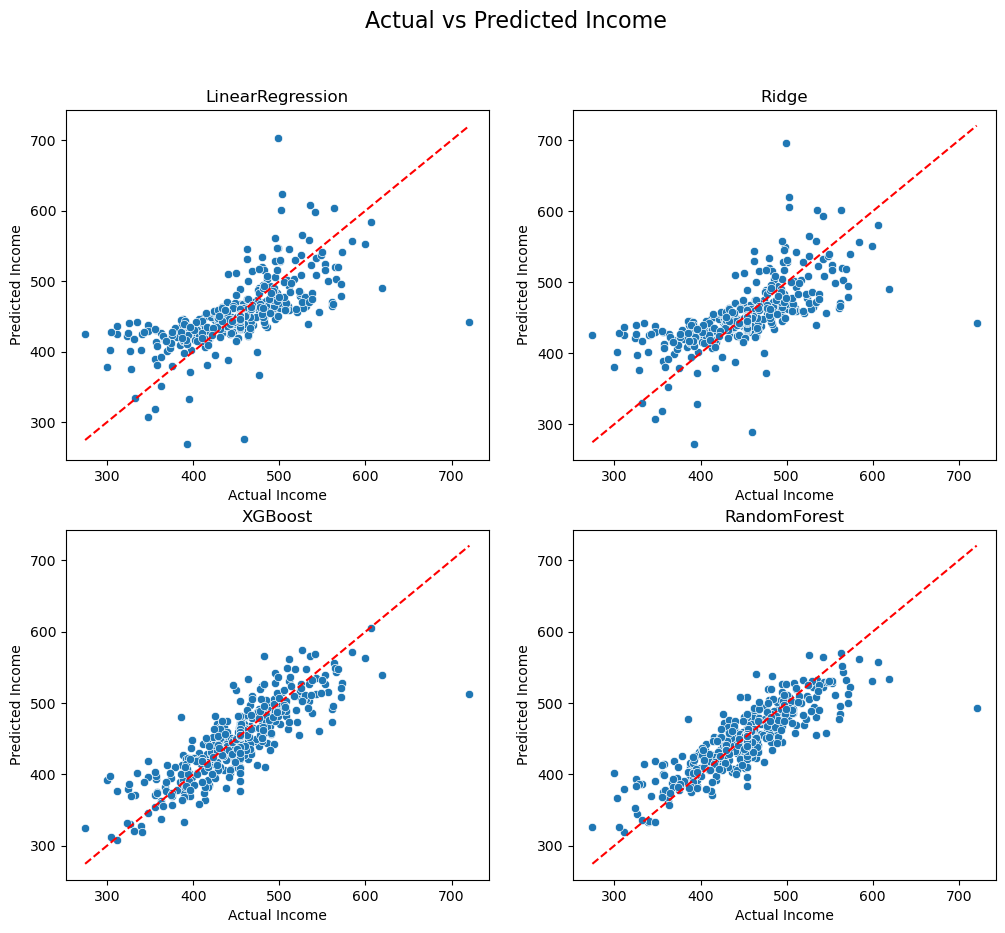

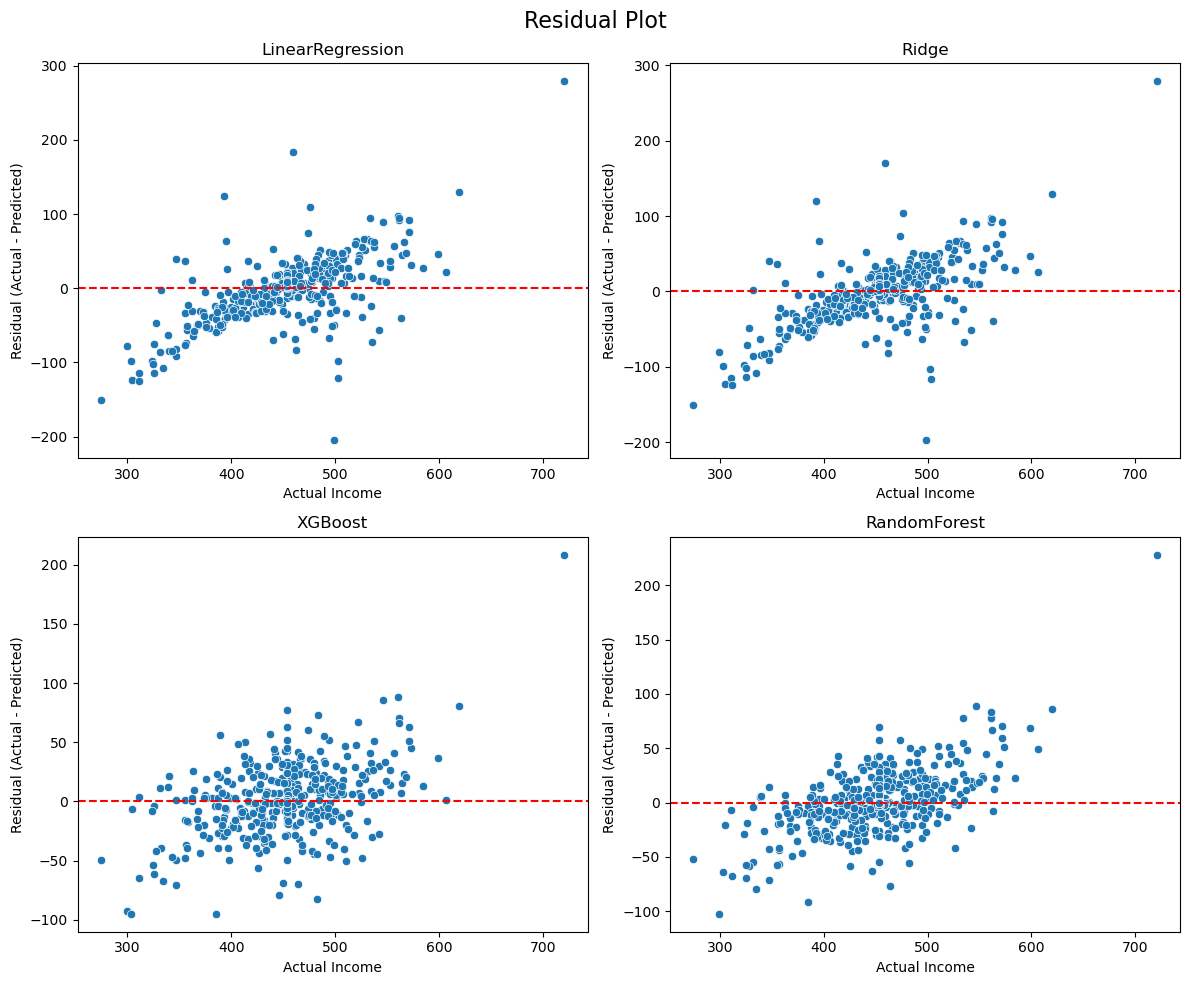

In [21]:
#画出四种模型结果的预测值与真实值的比较图和残差图

import matplotlib.pyplot as plt

fig1, axes1 = plt.subplots(2, 2, figsize=(12, 10))
fig1.suptitle("Actual vs Predicted Income", fontsize=16)
fig2, axes2 = plt.subplots(2, 2, figsize=(12, 10))
fig2.suptitle("Residual Plot", fontsize=16)

m = 0
n = 0
for name in y_pred.keys():
    sns.scatterplot(x=y_test5, y=y_pred[name], ax=axes1[m, n])
    axes1[m, n].plot([y_test5.min(), y_test5.max()], [y_test5.min(), y_test5.max()], 'r--')
    axes1[m, n].set_xlabel("Actual Income")
    axes1[m, n].set_ylabel("Predicted Income")
    axes1[m, n].set_title(name)
    residuals = y_test5 - y_pred[name]
    sns.scatterplot(x = y_test5, y = residuals, ax=axes2[m, n])
    axes2[m, n].axhline(0, color='red', linestyle='--')
    axes2[m, n].set_xlabel("Actual Income")
    axes2[m, n].set_ylabel("Residual (Actual - Predicted)")
    axes2[m, n].set_title(name)
    if m == 0 and n == 0:
        n += 1
    else:
        if m == 0 and n == 1:
            m += 1
        else:
            n = 0

plt.tight_layout()
plt.show()

#图中显示线性回归模型（LinearRegression和Ridge）的结果出现系统性偏差
#线性回归模型在高位低估，在
#低位高估，残差与实际值呈现一种明显的线性关系
#在XGBoost和RandomForest中，这种系统性偏差得到改善
#但依然存在趋势，且异常值、极端值的偏差仍较大